In [42]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from matplotlib import pyplot
fashion_dataset = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_dataset.load_data()      #train and test sets
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0      #validation set
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]        #validation set
height, width = X_train[0].shape
channel = 1
         ## CNN shape
X_train = X_train.reshape(-1, height, width, channel)
X_valid = X_valid.reshape(-1, height, width, channel)
X_test = X_test.reshape(-1, height, width, channel)
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(55000, 28, 28, 1), y=(55000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


In [43]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               

import logging
logging.getLogger('tensorflow').disabled = True

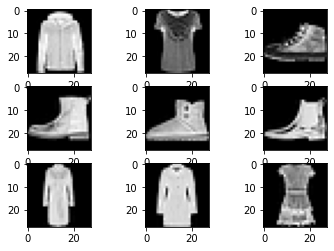

In [44]:
      # plot few images
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i][:,:,0], cmap=pyplot.get_cmap('gray'))
pyplot.show()

**Answer of A-C**

In [45]:
model = keras.models.Sequential([
keras.layers.Conv2D(32, 3, activation="relu", padding="same", input_shape=(28,28,1)),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Flatten(),
keras.layers.Dense(256,activation="relu"), #64
keras.layers.Dense(10,activation="softmax") #10
])

In [46]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 3, 3, 128)       

Epoch 1/30
550/550 [==============================] - 90s 162ms/step - loss: 1.3397 - accuracy: 0.5456 - val_loss: 0.8338 - val_accuracy: 0.6834
Epoch 2/30
550/550 [==============================] - 89s 162ms/step - loss: 0.7118 - accuracy: 0.7373 - val_loss: 0.6357 - val_accuracy: 0.7672
Epoch 3/30
550/550 [==============================] - 89s 162ms/step - loss: 0.6085 - accuracy: 0.7764 - val_loss: 0.5287 - val_accuracy: 0.8146
Epoch 4/30
550/550 [==============================] - 89s 162ms/step - loss: 0.5453 - accuracy: 0.7995 - val_loss: 0.5265 - val_accuracy: 0.8100
Epoch 5/30
550/550 [==============================] - 89s 162ms/step - loss: 0.5005 - accuracy: 0.8177 - val_loss: 0.4651 - val_accuracy: 0.8350
Epoch 6/30
550/550 [==============================] - 89s 162ms/step - loss: 0.4659 - accuracy: 0.8305 - val_loss: 0.4422 - val_accuracy: 0.8436
Epoch 7/30
550/550 [==============================] - 89s 162ms/step - loss: 0.4439 - accuracy: 0.8396 - val_loss: 0.4116 - val_ac

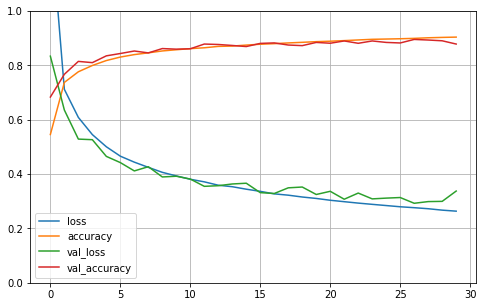

In [47]:
tf.keras.utils.plot_model(model, 'model_summary.png', show_shapes = True, show_layer_names=True)
    # compile and fit
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model_history = model.fit(X_train, y_train, batch_size=100, epochs=30, validation_data=(X_valid, y_valid))

model.evaluate(X_train, y_train)    # evaluate with training set

model.evaluate(X_test, y_test)     # evaluate with test set

weights = model.get_weights()
print(len(weights))
for arr in weights:
  print(arr.shape)
    # plot training performance
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig('incep')

In [48]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 3, 3, 128)       

313/313 [==============================] - 6s 18ms/step - loss: 49.1589 - accuracy: 0.8663
10
(3, 3, 1, 32)
(32,)
(3, 3, 32, 64)
(64,)
(3, 3, 64, 128)
(128,)
(1152, 256)
(256,)
(256, 10)
(10,)


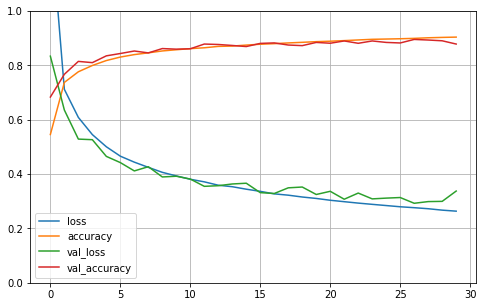

In [49]:
tf.keras.utils.plot_model(model, 'model_summary.png', show_shapes = True, show_layer_names=True)

    # evaluate with traint set
model.evaluate(X_train, y_train)
    # evaluate with test set
model.evaluate(X_test, y_test)
weights = model.get_weights()
print(len(weights))
for arr in weights:
  print(arr.shape)
    # plot training performance
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig('incep')

In [50]:
from tensorflow.keras.models import save_model
from tensorflow.keras.models import model_from_json

save_model(model,'data_mnist1') 

In [51]:
test_loss, acc =model.evaluate(X_test, y_test)
scores=acc

313/313 [==============================] - 6s 18ms/step - loss: 49.1589 - accuracy: 0.8663


In [52]:
       # prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
       # load and prepare the image
def load_image(filename):
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	img = img_to_array(img)
	img = img.reshape(1, 28, 28, 1)    #reshape with 1 channel
	img = img.astype('float32')
	img = img / 255.0
	return img
 
      # load an image and predict the class
def run_example():
	img = load_image('sample_image.png')
	model = load_model('data_mnist1')
	# predict the class
	result = np.argmax(model.predict(img),axis=-1)
	print(result[0])


# entry point, run the example
run_example()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


2


(10000, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted_test_labels_index: 0
y_test: 0
              precision    recall  f1-score   support

 T-shirt/top       0.77      0.89      0.82      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.66      0.91      0.76      1000
       Dress       0.95      0.78      0.86      1000
        Coat       0.77      0.73      0.75      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.82      0.54      0.65      1000
     Sneaker       0.96      0.92      0.94      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.92      0.98      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.86     10000
weighted avg       0.88      0.87      0.86     10000



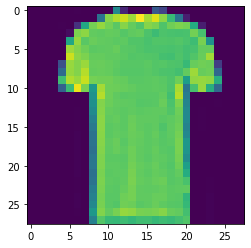

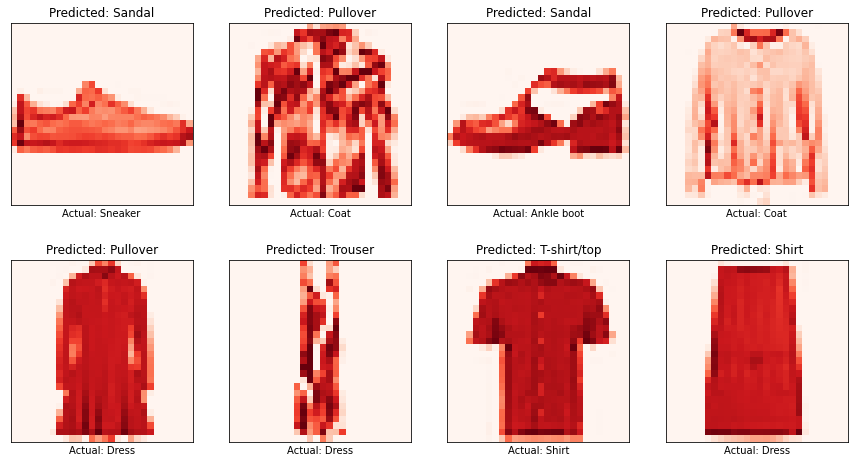

In [53]:
# Making predictions on Test dataset

predicted_test_labels = model.predict(X_test)

print(predicted_test_labels.shape)
print(predicted_test_labels[88])

predicted_test_labels_index = np.argmax(predicted_test_labels[88])
print("predicted_test_labels_index:",predicted_test_labels_index)
print("y_test:",y_test[88])


plt.figure()
plt.imshow(np.squeeze(X_test[88]))


#Evaluate model with test data and view results

#np.argmax(model.predict(img),axis=-1)
predicted_classes = np.argmax(model.predict(X_test),axis=-1)
print(classification_report(y_test, predicted_classes, target_names=class_names))


## incorrect data
incorrect = np.nonzero(predicted_classes!=y_test)[0]

# Display the first 16 incorrectly classified images from the test data set
plt.figure(figsize=(15, 8))
for j, incorrect in enumerate(incorrect[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap="Reds")
    plt.title("Predicted: {}".format(class_names[predicted_classes[incorrect]]))
    plt.xlabel("Actual: {}".format(class_names[y_test[incorrect]]))

**Answer of D**

In [54]:
model = keras.models.Sequential([
keras.layers.Conv2D(32, 3, activation="relu", padding="same", input_shape=(28,28,1)),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
#keras.layers.Dropout(rate=0.4),
keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
#keras.layers.MaxPooling2D(2),
keras.layers.Flatten(),
keras.layers.Dropout(rate=0.5),
#keras.layers.Dense(128,activation="relu"),
keras.layers.Dense(256,activation="relu"), #64
keras.layers.Dense(10,activation="softmax") #10
])

In [55]:
print(model.summary())
tf.keras.utils.plot_model(model, 'model_summary_2.png', show_shapes = True, show_layer_names=True)
# compile and fit
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=100, epochs=60, validation_data=(X_valid, y_valid))
# evaluate with traint set
model.evaluate(X_train, y_train)
# evaluate with test set
model.evaluate(X_test, y_test)
weights = model.get_weights()

print(len(weights))

for arr in weights:
  print(arr.shape)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 3, 3, 128)       

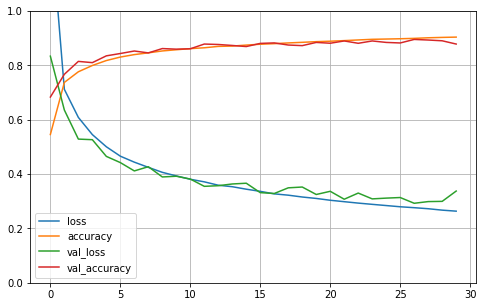

In [56]:
# plot training performance
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig('incep2')

In [57]:
save_model(model,'data_mnist2')

In [58]:
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image.png')
	# load model
	model = load_model('data_mnist2')
	# predict the class
	result = np.argmax(model.predict(img),axis=-1)
	print(result[0])


# entry point, run the example
run_example()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


2


(10000, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted_test_labels_index: 0
y_test: 0


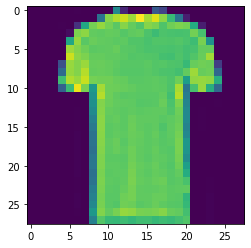

In [59]:
# Making predictions on Test dataset

predicted_test_labels = model.predict(X_test)

print(predicted_test_labels.shape)
print(predicted_test_labels[88])

predicted_test_labels_index = np.argmax(predicted_test_labels[88])

print("predicted_test_labels_index:",predicted_test_labels_index)
print("y_test:",y_test[88])

plt.figure()
plt.imshow(np.squeeze(X_test[88]))

In [62]:
from sklearn.metrics import classification_report
#Evaluate model with test data and view results

predicted_classes = np.argmax(model.predict(X_test),axis=-1)
print(classification_report(y_test, predicted_classes,target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.88      0.85      1000
     Trouser       0.95      0.99      0.97      1000
    Pullover       0.91      0.61      0.73      1000
       Dress       0.95      0.80      0.87      1000
        Coat       0.57      0.98      0.72      1000
      Sandal       0.93      0.99      0.96      1000
       Shirt       0.80      0.53      0.64      1000
     Sneaker       0.96      0.89      0.93      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.86     10000
   macro avg       0.88      0.86      0.86     10000
weighted avg       0.88      0.86      0.86     10000



**incorrectly classified test data**

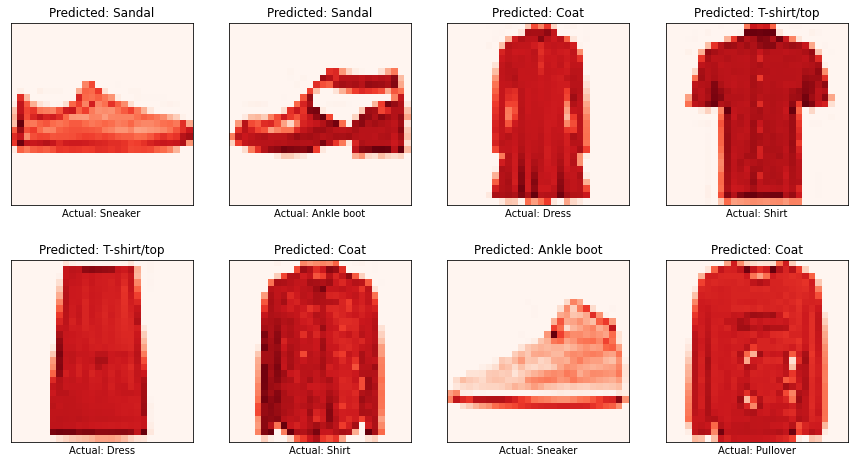

In [63]:
incorrect = np.nonzero(predicted_classes!=y_test)[0]

# Display the first 16 incorrectly classified images from the test data set
plt.figure(figsize=(15, 8))
for j, incorrect in enumerate(incorrect[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap="Reds")
    plt.title("Predicted: {}".format(class_names[predicted_classes[incorrect]]))
    plt.xlabel("Actual: {}".format(class_names[y_test[incorrect]]))